
#Social Network Analysis in Python

In [1]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Introduction


Let us first start with what do we mean by Social Networks. Below you see a network of Bollywood actors as nodes. They are connected with solid lines if they have worked together in at least one movie.

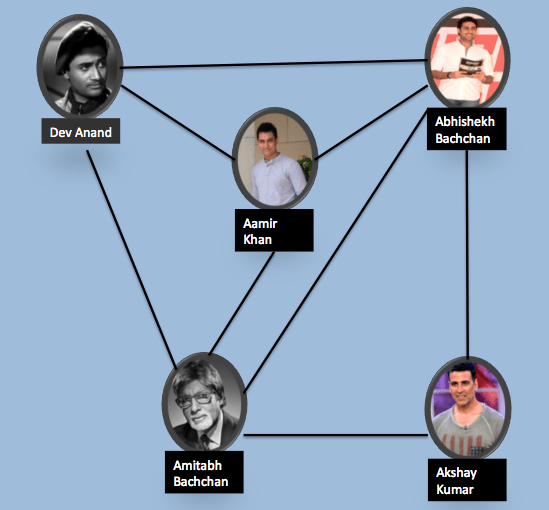

So, we can see that both Amitabh Bachchan and Abhishek Bachchan have acted with all the actors in the network, while Akshay Kumar has worked with only two Bachchans. Interesting right!

This too is a social network. Any network with connections between individuals, where the connections capture the relationship between them is a social network. Analyzing these networks can give us great insight about the people in the network like who are real influencers, who are most connected, etc.

Each network consists of:

Nodes: The individuals whose network we are building. Actors in the above example.

Edges: The connection between the nodes. It represents a relationship between the nodes of the network. In our example, the relationship was that the actors have worked together.

##Symmetric Networks

The first network of actors that we created above is a symmetric network because the relationship "working together in a movie" is a symmetric relationship. If A is related to B, B is also related to A. Let us create the network we saw above in NetworkX.

We will be using the Graph() method to create a new network and add_edge() to add an edge between two nodes.

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

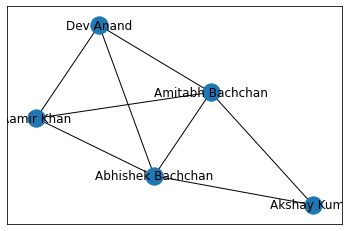

In [3]:
nx.draw_networkx(G_symmetric)

##Asymmetric Networks

What if the relationship between nodes is 'child of', then the relationship is no longer symmetric. If A is the child of B, then B is not a child of A. Such a network where the relationship is asymmetric (A is related to B, does not necessarily means that B is associated with A) is called an Asymmetric network. We can build the asymmetric network in NetworkX using DiGraph method, which is short of Directional Graph. Let us make an asymmetric graph.

In [4]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

Now we visualize it. We can use the draw_networkx() function as before. However, it is possible that nodes do not separate out and are distinctly visible in the network drawn. To take care of this, we can use the function to force a layout, which positions the nodes in a manner that we can distinctly see them. We can accomplish this using spring_layout() function, followed by the draw_networkx() function.

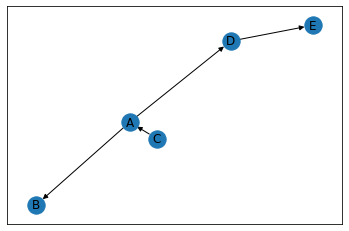

In [5]:
nx.spring_layout(G_asymmetric)
nx.draw_networkx(G_asymmetric)

##Weighted Networks

Till now we had networks without weights, but it is possible that networks are made with weights, for example, if in our initial network we consider the number of movies done together as a weight, we will get a Weighted Network. Let us make one again of the actors, but this time we add weight to the network, each edge has a weight signifying the number of movies they have done together.

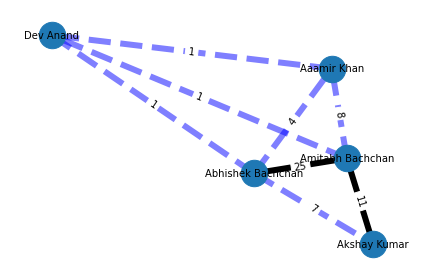

In [6]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

elarge = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d["weight"] > 10]
esmall = [(u, v) for (u, v, d) in G_weighted.edges(data=True) if d["weight"] <= 10]

pos = nx.spring_layout(G_weighted, seed=7)

# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=700)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G_weighted, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed")

# node labels
nx.draw_networkx_labels(G_weighted, pos, font_size=10, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G_weighted, "weight")
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

##Multigraph

We can give different attributes to the edges. For example, we can define a relation of neighbor between two nodes 'A' and 'B' using relation attribute. If within a network two nodes are connected with two different edges (relations) we have a multigraph. We can make a multigraph utilizing the MultiGraph class.

In [7]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')

0

This code will construct a graph with two edges between A and B. We can check the connections using G.edges(), the output would show:

In [8]:
G.edges.data()

MultiEdgeDataView([('A', 'B', {'relation': 'neighbor'}), ('A', 'B', {'relation': 'friend'}), ('B', 'C', {'relation': 'neighbor'}), ('C', 'D', {'relation': 'friend'})])

##Network Connectivity

Now the network is made, can we know more about a particular node in the network? Well yes, let us explore some of them.

###Degree 
Degree of a node defines the number of connections a node has. NetworkX has the function degree which we can use to determine the degree of a node in the network.

In [9]:
nx.degree(G_symmetric, 'Dev Anand')

3

This will return a value of 3, as Dev Anand has worked with only three actors in the network.

###Clustering Coefficient
It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters. We can determine the clusters of a node, Local Clustering Coefficient, which is the fraction of pairs of the node's friends (that is connections) that are connected with each other. To determine the local clustering coefficient, we make use of nx.clustering(Graph, Node) function.

In the symmetric Actor-network, you will find that Dev Anand has a local clustering coefficient of 1 and Abhishek Bachchan has a local clustering coefficient of 0.67.

The average clustering coefficient (sum of all the local clustering coefficients divided by the number of nodes) for the symmetric Actor-network is 0.867. We can obtain it using:

In [10]:
nx.average_clustering(G_symmetric)

0.8666666666666666

###Distance
We can also determine the shortest path between two nodes and its length in NetworkX using nx.shortest_path(Graph, Node1, Node2) and nx.shortest_path_length(Graph, Node1, Node2) functions respectively.

In [11]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

In [19]:
nx.shortest_path_length(G_symmetric, 'Dev Anand', 'Akshay Kumar')

2

We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node. networkX provides the function bfs_tree to do it. And so if you try T = nx.bfs_tree(G_symmetric, 'Dev Anand') and now draw this tree, we will get a network structure telling how we can reach other nodes of the network starting from Dev Anand

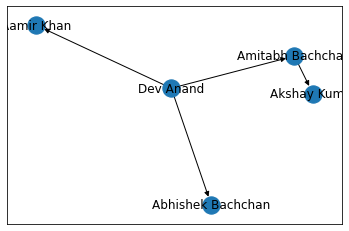

In [12]:
from networkx import bfs_tree

T = nx.bfs_tree(G_symmetric, 'Dev Anand')

nx.draw_networkx(T)

###Eccentricity
Eccentricity of a node A is defined as the largest distance between A and all other nodes. It can be found using nx.eccentricity() function. In the symmetric Actor-network, Dev Anand has an eccentricity of 2, and Abhishek Bachchan has an eccentricity of 1 (It is connected to all).

In [21]:
nx.eccentricity(G_symmetric)

{'Aamir Khan': 2,
 'Abhishek Bachchan': 1,
 'Akshay Kumar': 2,
 'Amitabh Bachchan': 1,
 'Dev Anand': 2}

##Network Influencers
Above we learned some of the network distance measures, they are useful in knowing how the information will spread through the network. In this section, we will learn how to find the most important nodes (individuals) in the network. These parameters are called as centrality measures.

Remember that popular girl from your high school or the schools top baseball player. These were the people who had the power to make your high school experience hell or heaven. What gave them this power? Centrality Measures can help us in identifying popularity, most liked, and biggest influencers within the network.

###Degree Centrality
The people most popular or more liked usually are the ones who have more friends. Degree centrality is a measure of the number of connections a particular node has in the network. It is based on the fact that important nodes have many connections. NetworkX has the function degree_centrality() to calculate the degree centrality of all the nodes of a network.

###Eigenvector Centrality
It is not just how many individuals one is connected too, but the type of people one is connected with that can decide the importance of a node. In Delhi Roads whenever the traffic police capture a person for breaking the traffic rule, the first sentence that traffic police hears is "Do you know whom I am related to?".

Eigenvector centrality is a measure of exactly this. It decides that a node is important if it is connected to other important nodes. We can use the eigenvector_centrality() function of NetworkX to calculate eigenvector centrality of all the nodes in a network.

The Google's Pagerank algorithm is a variant of Eigenvector centrality algorithm.

###Betweenness Centrality
The Betweenness Centrality is the centrality of control. It represents the frequency at which a point occurs on the geodesic (shortest paths) that connected pair of points. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

Networkx has the function betweenness_centrality() to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

##Combining at all
Let us start with the Facebook data, for our analysis here we will use Facebook combined ego networks dataset, it contains the aggregated network of ten individuals’ Facebook friends list. You can download the required facebook_combined.txt file from the [Stanford University](https://snap.stanford.edu/data/egonets-Facebook.html) site.

You can get your own Facebook/Twitter data using the Facebook/Twitter APIs. Look forward to the next forthcoming tutorial where we will learn how to use Facebook and Twitter APIs to get data and use the information acquired here to analyze it.

We read in the file and construct the Graph:

In [13]:
!wget --no-check-certificate \
  https://snap.stanford.edu/data/facebook_combined.txt.gz

--2022-07-30 13:25:59--  https://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K   388KB/s    in 0.5s    

2022-07-30 13:26:00 (388 KB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]



In [14]:
G_fb = nx.read_edgelist("/content/facebook_combined.txt.gz", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))

Graph with 4039 nodes and 88234 edges


The network consists of 4,039 nodes, connected via 88,234 edges! Yep, it is a big network. You get the information using the info() function.

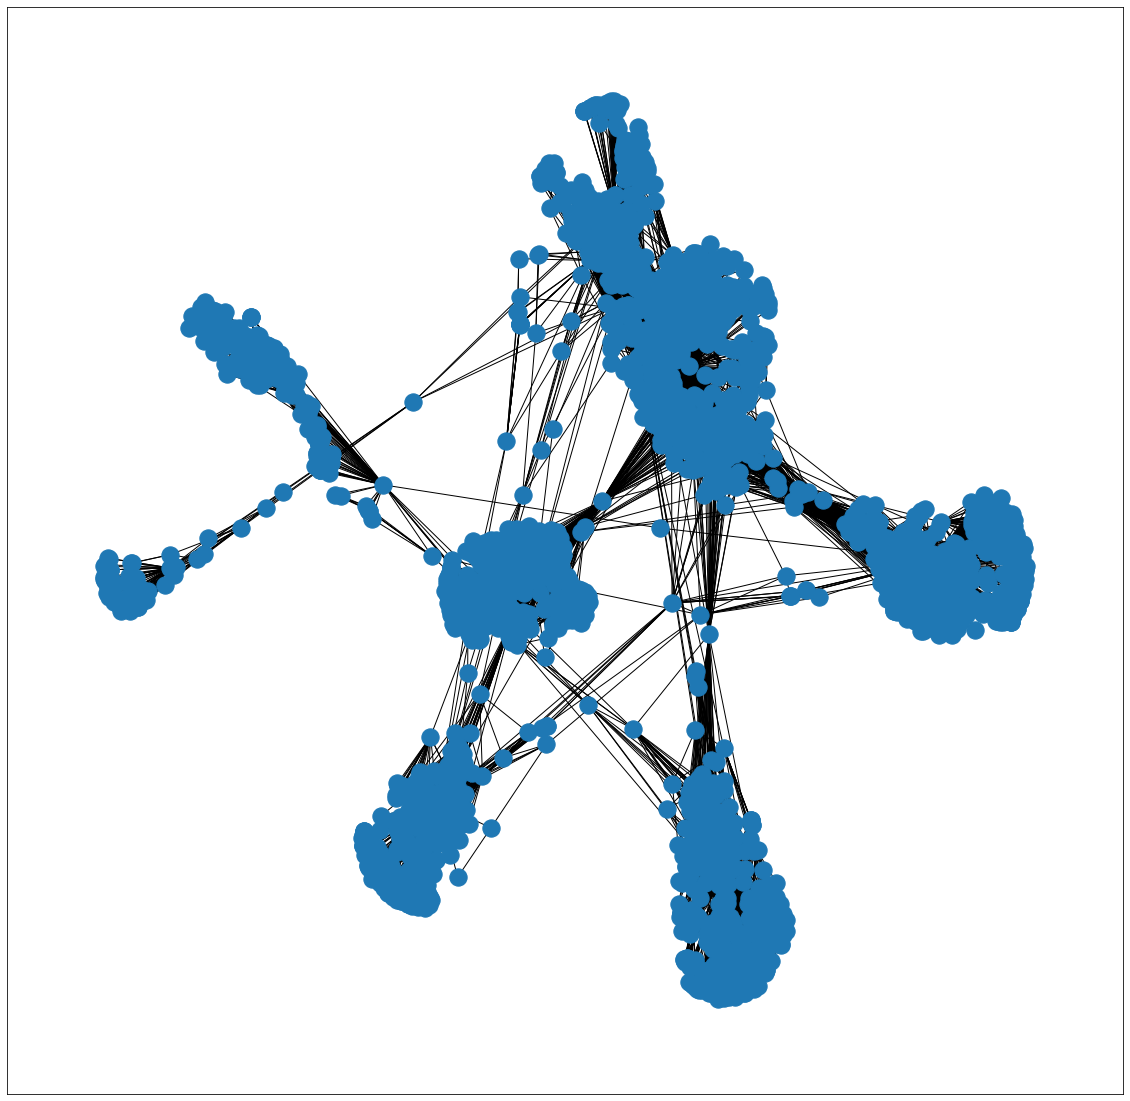

In [25]:
fig, ax = plt.subplots(figsize=(20,20))
nx.draw_networkx(G_fb, with_labels=False)
plt.show()

We can also visualize the network such that the node color varies with Degree and node size with Betweenness Centrality. The code to do this is:

(-1.1728479331731798,
 0.9341262048482895,
 -0.9110353863239289,
 1.1815915977954865)

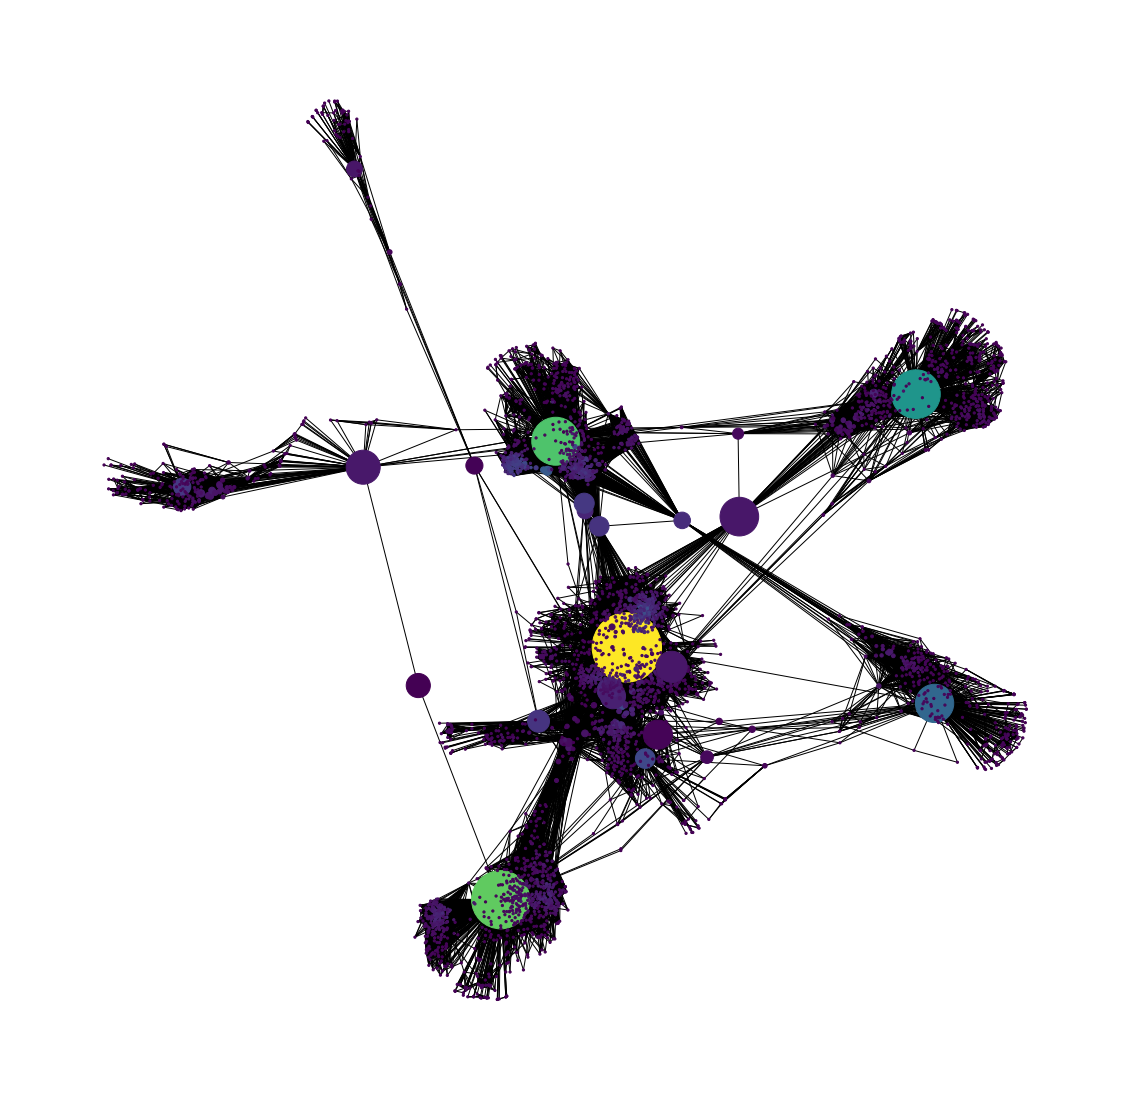

In [16]:
pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

You can also know the labels of the nodes with the highest betweenness centrality using:

The table below lists the five node labels with the highest centrality measures.

In [17]:
eigCent = nx.eigenvector_centrality_numpy(G_fb)

In [18]:
sort_bet = pd.DataFrame(sorted(betCent, key=betCent.get, reverse=True)[:5], columns=['Betweenness Centrality'])
sort_eig = pd.DataFrame(sorted(eigCent, key=eigCent.get, reverse=True)[:5], columns=['Eigenvector Centrality'])
sort_deg = pd.DataFrame(sorted(G_fb.nodes(), key=G_fb.degree(), reverse=True)[:5], columns=['Degree Centrality'])
table = pd.concat([sort_deg, sort_eig, sort_bet], axis=1)
display(table)

,Degree Centrality,Eigenvector Centrality,Betweenness Centrality
0,107,1912,107
1,1684,2266,1684
2,1912,2206,3437
3,3437,2233,1912
4,0,2464,1085


We can see that some nodes are common between Degree Centrality, which is a measure of degree, and Betweenness Centrality which controls the information flow. It is natural that nodes that are more connected also lie on shortest paths between other nodes. The node 1912 is an important node as it is crucial according to all three centrality measures that we had considered.